## npy 불러와 이미지 확인하고 정답 라벨 만들기

In [15]:
import numpy as np
fruits = np.load('data/fruits.npy')
print(fruits.shape)

(300, 100, 100)


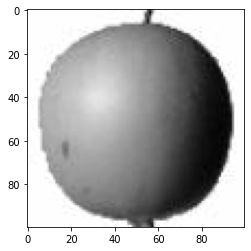

In [16]:
# image 확인하기
import matplotlib.pyplot as plt

plt.imshow(fruits[0], cmap='gray_r')
plt.show()

In [17]:
# Target(정답) 만들기 - 데이터를 알고 있으니까 만들 수 있음
target = np.concatenate([np.zeros(100), np.ones(100), np.full(100, 2)])
print(target.shape)

(300,)


## train test 분류하기

In [18]:
train = fruits.reshape(-1, 100, 100, 1)/255.0

In [19]:
from sklearn.model_selection import train_test_split

trainData, testData, trainTarget, testTarget = train_test_split(train, target, test_size=0.2)

trainData, validData, trainTarget, validTarget = train_test_split(trainData, trainTarget, test_size=0.2)

print(trainData.shape, validData.shape, trainTarget.shape, validTarget.shape)

(192, 100, 100, 1) (48, 100, 100, 1) (192,) (48,)


In [20]:
testData = testData.reshape(-1, 100, 100, 1)

## CNN 만들기

In [21]:
from tensorflow import keras

In [22]:
model = keras.Sequential()

In [23]:
model.add(
  keras.layers.Conv2D(
    filters=32,
    kernel_size=(3, 3),
    # 가운데 정렬이 잘 된 데이터니까 패딩 안 줘 봄
    activation='relu',
    input_shape=(100, 100, 1)
  )
)

In [24]:
model.add(
  keras.layers.MaxPooling2D(
    pool_size=2,
  )
)

In [25]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 98, 98, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 49, 49, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 76832)             0         
                                                                 
 dense_2 (Dense)             (None, 100)               7683300   
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense_3 (Dense)             (None, 3)                 303       
                                                      

In [26]:
model.compile(
  optimizer='adam',
  loss='sparse_categorical_crossentropy',
  metrics=['accuracy']
)

checkpint_cb = keras.callbacks.ModelCheckpoint(
  filepath='fashion_mnist.h5',
)                             
# 처음 할 때는 early stopping은 안쓰는 것이 좋음
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)

history = model.fit(
  trainData,
  trainTarget,
  epochs=10,
  validation_data=(validData, validTarget),
  callbacks=[checkpint_cb]
)


Epoch 1/10
6/6 [==============================] - 2s 333ms/step - loss: 1.9959 - accuracy: 0.4740 - val_loss: 0.4979 - val_accuracy: 0.7500
Epoch 2/10
6/6 [==============================] - 1s 267ms/step - loss: 0.2530 - accuracy: 0.8854 - val_loss: 0.0425 - val_accuracy: 1.0000
Epoch 3/10
6/6 [==============================] - 1s 269ms/step - loss: 0.0664 - accuracy: 0.9844 - val_loss: 0.0250 - val_accuracy: 1.0000
Epoch 4/10
6/6 [==============================] - 1s 266ms/step - loss: 0.0425 - accuracy: 0.9844 - val_loss: 0.0061 - val_accuracy: 1.0000
Epoch 5/10
6/6 [==============================] - 1s 274ms/step - loss: 0.0126 - accuracy: 1.0000 - val_loss: 0.0053 - val_accuracy: 1.0000
Epoch 6/10
6/6 [==============================] - 1s 274ms/step - loss: 0.0049 - accuracy: 1.0000 - val_loss: 0.0018 - val_accuracy: 1.0000
Epoch 7/10
6/6 [==============================] - 2s 284ms/step - loss: 0.0041 - accuracy: 1.0000 - val_loss: 7.2043e-04 - val_accuracy: 1.0000
Epoch 8/10
6/6 [

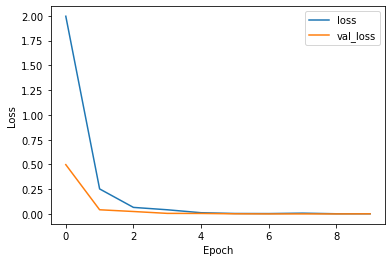

In [27]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

In [28]:
model.evaluate(testData, testTarget)

2/2 [==============================] - 0s 21ms/step - loss: 0.0074 - accuracy: 1.0000


[0.007424560841172934, 1.0]